In [74]:
import pandas as pd
import numpy as np
import os
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# https://drive.google.com/file/d/1QRo-R7IY7uV69VqdBXEkZJC06_0z3kIA/view?usp=sharing
file_id = '1QRo-R7IY7uV69VqdBXEkZJC06_0z3kIA'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)
data2 = data.drop('State', axis=1)
data2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [65]:
prep1 = SimpleImputer(missing_values=np.nan, strategy='mean')
# prep2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data2[['R&D Spend', 'Administration']] = prep1.fit_transform(data2[['R&D Spend', 'Administration']])
# data[['State']] = prep2.fit_transform(data[['State']])

In [23]:
data2

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20000,136897.800000,471784.10,192261.83
1,162597.70000,151377.590000,443898.53,191792.06
2,153441.51000,101145.550000,407934.54,191050.39
3,144372.41000,118671.850000,383199.62,182901.99
4,142107.34000,91391.770000,366168.42,166187.94
5,131876.90000,99814.710000,362861.36,156991.12
6,134615.46000,147198.870000,127716.82,156122.51
7,130298.13000,145530.060000,323876.68,155752.60
8,120542.52000,148718.950000,311613.29,152211.77
9,123334.88000,108679.170000,304981.62,149759.96


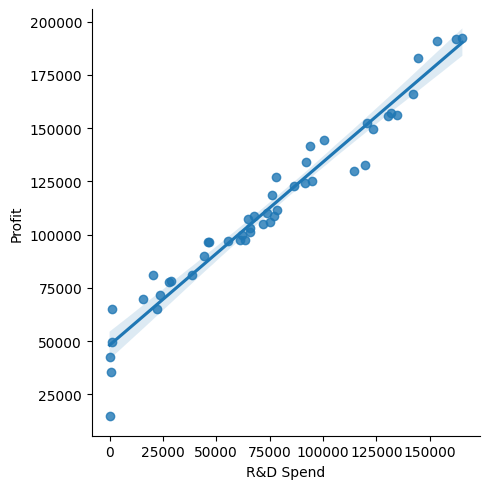

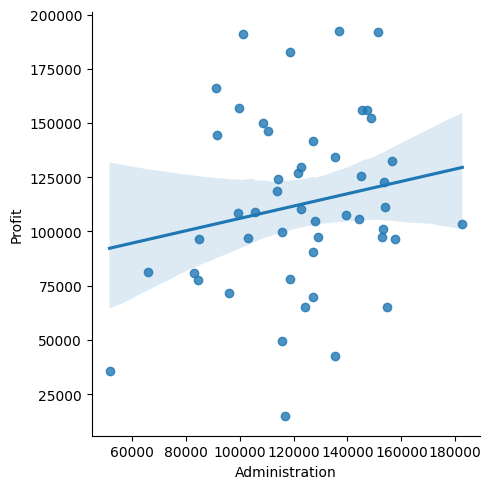

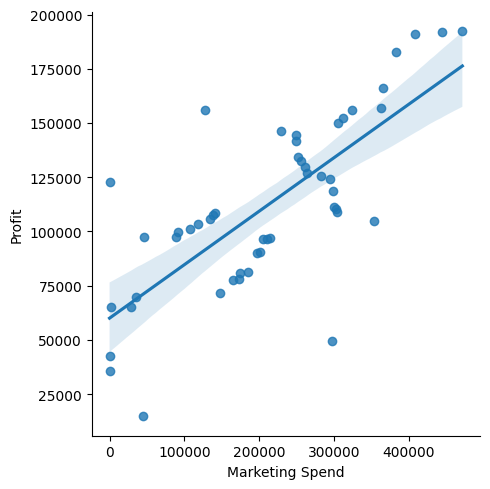

In [91]:
sns.lmplot(x='R&D Spend', y='Profit', data=data)
sns.lmplot(x='Administration', y='Profit', data=data)
sns.lmplot(x='Marketing Spend', y='Profit', data=data)


In [66]:
#I extract the independent variables (features) by selecting all rows and all columns except the last one
x = data2.iloc[:, :-1].values

#I extract the dependent variable (target) by selecting all rows and only the last column
y = data2.iloc[:, -1].values

#I print the independent and dependent variables
print("Independent Variable:\n", x)
print("Dependent Variable:\n", y)


Independent Variable:
 [[165349.2        136897.8        471784.1       ]
 [162597.7        151377.59       443898.53      ]
 [153441.51       101145.55       407934.54      ]
 [144372.41       118671.85       383199.62      ]
 [142107.34        91391.77       366168.42      ]
 [131876.9         99814.71       362861.36      ]
 [134615.46       147198.87       127716.82      ]
 [130298.13       145530.06       323876.68      ]
 [120542.52       148718.95       311613.29      ]
 [123334.88       108679.17       304981.62      ]
 [ 74072.99875    110594.11       229160.95      ]
 [100671.96        91790.61       249744.55      ]
 [ 93863.75       127320.38       249839.44      ]
 [ 91992.39       135495.07       252664.93      ]
 [119943.24       156547.42       256512.92      ]
 [114523.61       122616.84       261776.23      ]
 [ 78013.11       121597.55       264346.06      ]
 [ 94657.16       145077.58       282574.31      ]
 [ 91749.16       114175.79       294919.57      ]
 [ 86419

In [ ]:
# cat_col = ['State']

# indices = [data.columns.get_loc(col) for col in cat_col]


# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), indices)], remainder= 'passthrough')
# x = np.array(ct.fit_transform(x))
# x

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

print("x train:\n",x_train)
print("x test:\n",x_test)
print("y train:\n",y_train)
print("y test:\n",y_test)

x train:
 [[ 63408.86       129219.61        46085.25      ]
 [ 38558.51        82982.09       174999.3       ]
 [ 78389.47       153773.43       299737.29      ]
 [ 74072.99875    127056.21       201126.82      ]
 [ 86419.7        153514.11            0.        ]
 [ 23640.93        96189.63       148001.11      ]
 [     0.         116983.8         45173.06      ]
 [ 75328.87       144135.98       134050.07      ]
 [ 73994.56       122782.75       303319.26      ]
 [ 91992.39       135495.07       252664.93      ]
 [ 27892.92        84710.77       164470.71      ]
 [ 94657.16       145077.58       282574.31      ]
 [  1000.23       124153.04         1903.93      ]
 [ 77044.01        99281.34       140574.81      ]
 [ 67532.53       105751.03       304768.73      ]
 [142107.34        91391.77       366168.42      ]
 [ 55493.95       103057.49       214634.81      ]
 [119943.24       156547.42       256512.92      ]
 [ 61994.48       115641.28        91131.24      ]
 [ 74072.99875    110

In [56]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# # x_train[:, 4:] = scaler.fit_transform(x_train[:, 4:])
# # x_test[:, 4:] = scaler.fit_transform(x_test[:, 4:])


# print("TRAINING RESULT:\n",x_train)
# print("TESTING RESULT:\n",x_test)


TRAINING RESULT:
 [[-0.43631529  0.1935342  -1.73540883]
 [-0.80257815 -1.43749951 -0.31814681]
 [ 0.02801719  1.43916838  0.82225408]
 [-1.40670247  0.57952751 -1.04903801]
 [ 0.18679844  0.96712191 -1.49147205]
 [-1.24243719 -1.1064063  -0.54839928]
 [-1.45899704 -0.24813769 -1.09724454]
 [-0.09732474  1.3308768  -1.15348615]
 [-0.19422368 -0.26548116  1.57250257]
 [ 0.98036611  1.0861698   0.88690772]
 [-0.98995523 -1.3326582  -0.37954631]
 [ 0.67913752  1.27553855  0.86480617]
 [-1.33345153 -0.02002584 -1.26981807]
 [-0.01533376 -1.45146977 -0.83608376]
 [-0.35679002 -1.16762652  1.02861152]
 [ 1.1282043  -0.96093766  0.80299036]
 [-0.84838618 -1.43196623 -0.01662029]
 [ 1.09473205  1.329104    0.31067772]
 [-0.59134921 -0.62465123 -1.55056825]
 [-0.21949548 -1.55723721  0.32164319]
 [-0.18940679  1.61487282 -0.58997845]
 [-1.02438819  0.91682244 -1.18390089]
 [-0.8722531   1.50083588 -0.07165104]
 [ 0.652444   -0.87468309  1.20259563]
 [-0.0623717  -0.92297091  1.2945617 ]
 [-0.63

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
print("Accuracy: ", model.score(x_test,y_test)* 100)

Accuracy:  96.66018485619587


In [70]:
Predicted = model.predict(x_test)

In [71]:
df = {'Predicted': Predicted, 'Actual': y_test}
pd.DataFrame(df)

,Predicted,Actual
0,113999.969196,105008.31
1,90684.957358,96479.51
2,75315.784722,78239.91
3,70419.804668,81229.06
4,180086.126814,191050.39
5,171807.438558,182901.99
6,50318.868710,35673.41
7,101507.158848,101004.64
8,57229.045806,49490.75
9,97493.069978,97483.56


In [72]:
from sklearn import metrics
import seaborn as seabornInstance

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Predicted)))


Mean Absolute Error: 7347.419041809364
Mean Squared Error: 75774472.22457759
Root Mean Squared Error: 8704.853371802285


In [84]:
import pickle
prediction_test = model.predict(x_test)

print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
df = {'Predicted': prediction_test, 'Actual': y_test}
pd.DataFrame(df)


Mean sq. errror between y_test and predicted = 940765.2410194731


,Predicted,Actual
0,113999.969196,105008.31
1,90684.957358,96479.51
2,75315.784722,78239.91
3,70419.804668,81229.06
4,180086.126814,191050.39
5,171807.438558,182901.99
6,50318.868710,35673.41
7,101507.158848,101004.64
8,57229.045806,49490.75
9,97493.069978,97483.56


In [85]:
from sklearn.metrics import r2_score
r_sq = r2_score(prediction_test, y_test)
print(r_sq)


0.9570328311089439


In [86]:
print(model.predict([[165349.20, 136897.80, 471784.10]]))


[190180.26445289]
